 # Logistic regression on my dataset


### First option, by the example of notebook

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load your dataset
raw_df = pd.read_csv('/kaggle/input/zinutes/apdorotas_for_logistic_regresion.csv')
# raw_df=pd.read_csv("apdorotas_for_logistic_regresion.csv")

# Step 2: Create training, validation, and test sets
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Step 3: Define input columns (only 'Message') and target column ('Sender')
input_cols = ['Message']  # Input column
target_col = 'Sender'  # Target column

# Step 4: Separate the inputs and targets for training, validation, and test sets
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# ------------------------------------------
# Step 5: TF-IDF Vectorization for 'Message' column
# ------------------------------------------

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Message' column for training, and transform validation and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_inputs['Message'])
X_val_tfidf = tfidf_vectorizer.transform(val_inputs['Message'])
X_test_tfidf = tfidf_vectorizer.transform(test_inputs['Message'])

# Drop 'Message' column from inputs as we have it encoded with TF-IDF
train_inputs.drop(columns='Message', inplace=True)
val_inputs.drop(columns='Message', inplace=True)
test_inputs.drop(columns='Message', inplace=True)

# Convert TF-IDF sparse matrices to DataFrames for easier handling
tfidf_train_df = pd.DataFrame(X_train_tfidf.toarray())
tfidf_val_df = pd.DataFrame(X_val_tfidf.toarray())
tfidf_test_df = pd.DataFrame(X_test_tfidf.toarray())

# Select the combined inputs for training, validation, and test sets
X_train = tfidf_train_df.reset_index(drop=True)
X_val = tfidf_val_df.reset_index(drop=True)
X_test = tfidf_test_df.reset_index(drop=True)

# -----------------------------------------
# Step 6: Label Encoding for 'Sender' target
# -----------------------------------------

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(raw_df['Sender'])

# Encode the target variable
train_targets_encoded = label_encoder.transform(train_targets)
val_targets_encoded = label_encoder.transform(val_targets)
test_targets_encoded = label_encoder.transform(test_targets)

# ----------------------------------------------
# Step 7: Train the Logistic Regression Model
# ----------------------------------------------

# Initialize the model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, train_targets_encoded)

# ----------------------------------------------
# Step 8: Make Predictions
# ----------------------------------------------

# Predict on validation and test data
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

# ----------------------------------------------
# Step 9: Evaluate the Model
# ----------------------------------------------

# Calculate accuracy for validation set
val_accuracy = accuracy_score(val_targets_encoded, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Calculate accuracy for test set
test_accuracy = accuracy_score(test_targets_encoded, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

## the second attempt with a bit of help gpt

In [ ]:
# pagal paizdį
import pandas as pd

# Step 1: Load your dataset
# raw_df = pd.read_csv('/kaggle/input/zinutes/apdorotas_for_logistic_regresion.csv')
raw_df=pd.read_csv("apdorotas_for_logistic_regresion.csv")
raw_df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split

X = raw_df[['Message']]  # Input column
y = raw_df['Sender']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline(steps=[
                      ('tfidf', TfidfVectorizer()),
                      ('classifier', LogisticRegression(solver='liblinear', random_state=42))
                      ],
                      verbose=True,)
pipe.fit(X_train["Message"], y_train)

pipe.predict(X_test['Message'])


In [ ]:

import pandas as pd

# Step 1: Load your dataset
# raw_df = pd.read_csv('/kaggle/input/zinutes/apdorotas_for_logistic_regresion.csv')
raw_df=pd.read_csv("dbscan_ir_tnse.csv")
# raw_df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split

X = raw_df[['Message']]  # Input column
y = raw_df['Sender']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

# Step 3: Define input columns (only 'Message') and target column ('Sender')
input_cols = [['Message']]  # Input column (only the Message column)
target_col = ['Sender']  # Target column (Sender is the target)


# Step 5: Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'Message')  # TF-IDF for 'Message'
    ],
    remainder='drop',
    n_jobs=-1
)

# Step 6: Create a pipeline with preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)



print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Test Set Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load your dataset
raw_df = pd.read_csv("dbscan_ir_tnse.csv")
# raw_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)


# Step 2: Define input and target columns
X = raw_df[['Message']]  # Input column
y = raw_df['Sender']     # Target column

# Step 3: Create training and validation sets
X_train = X.head(16800)
y_train = y.head(16800)

X_val = X.iloc[16800:24000]
y_val = y.iloc[16800:24000]

X_test=X.iloc[24000:]
y_test=y.iloc[24000:]

# Step 4: Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'Message')  # TF-IDF for 'Message'
    ],
    remainder='drop'
)

# Step 5: Create a pipeline with preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Step 6: Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions on the validation set
y_pred = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
# Step 8: Evaluate the model on the validation set
print("Validation Set Accuracy:", accuracy_score(y_val, y_pred))
print("Validation Set Classification Report:\n", classification_report(y_val, y_pred))

print("Test Set Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))

## Kitas budas su pipline

In [ ]:
#Paklausti, kodel neina su object
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer, make_column_selector

# Step 1: Load your dataset
raw_df = pd.read_csv("/kaggle/input/valyta-vesrsion-1/dbscan_ir_tnse.csv")

# Step 2: Define input and target columns
X = raw_df[['Message']]  # Input column
y = raw_df['Sender']     # Target column

# Debugging shapes
print(f"Original dataset shape: {X.shape}, {y.shape}and data type{type(X)}")

# Step 3: Create training, validation, and test sets
X_train = X.iloc[:16800]
y_train = y.iloc[:16800]

X_val = X.iloc[16800:24000]
y_val = y.iloc[16800:24000]

X_test = X.iloc[24000:]  # Test input data
y_test = y.iloc[24000:]   # Corrected to use y for target data

# Debugging shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Step 4: Define the TF-IDF transformer for text data
categorical_transformer_Messages = Pipeline(steps=[
    ('tfidf', TfidfVectorizer())
])

# Step 5: Create preprocessing steps using make_column_selector
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', categorical_transformer_Messages,"Message")  # Select all object type columns
    ],
    remainder='drop'
)

# Step 6: Create a pipeline with preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Step 7: Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 8: Make predictions on the validation and test sets
y_pred = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)

# Step 9: Evaluate the model on the validation set
print("Validation Set Accuracy:", accuracy_score(y_val, y_pred))
print("Validation Set Classification Report:\n", classification_report(y_val, y_pred))

# Step 10: Evaluate the model on the test set
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test))


## XGBoost

In [ ]:
import time
import pandas as pd
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold

# Load your data
df = pd.read_csv('/kaggle/input/valyta-vesrsion-1/dbscan_ir_tnse.csv')  # Update with your actual file path

# Separate features and target
X = df[['Message']]
y = df['Sender']  # Using 'Sender' as target

# Filter out classes in 'Sender' with fewer than two instances
sender_counts = y.value_counts()
filtered_indices = y[y.isin(sender_counts[sender_counts > 20].index)].index
X_filtered = X.loc[filtered_indices]
y_filtered = y.loc[filtered_indices]

# Encode the target variable
label_encoder = LabelEncoder()
y_filtered = label_encoder.fit_transform(y_filtered)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

# Define preprocessing steps for each column type
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Message')         # Feature extraction for text column
    ])

# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, n_jobs=-1))
])

start_time = time.time()
# Train model
print("fit laikas")
pipeline.fit(X_train, y_train)
end_time = time.time()
time=end_time - start_time
print(f"{time:.4f}s")

# Make predictions
print("spejimo laikas")
start_time = time.time()
y_pred = pipeline.predict(X_test)

end_time = time.time()
time=end_time - start_time
print(f"{time:.4f}s")

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time

# Sample data (you can replace this with your actual DataFrame)

df = pd.read_csv("/kaggle/input/valyta-vesrsion-1/dbscan_ir_tnse.csv")

# Filter out senders with fewer than 20 appearances
sender_counts = df['Sender'].value_counts()
filtered_senders = sender_counts[sender_counts > 20].index
df_filtered = df[df['Sender'].isin(filtered_senders)]

# Separate features and target
X = df_filtered[['Message']]
y = df_filtered['Sender']  # Using 'Sender' as target

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define preprocessing steps for each column type
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Message')  # Feature extraction for the text column
    ]
)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=6),
    "Random Forest": RandomForestClassifier(random_state=42, max_depth=6, n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators=100)
}

# Iterate over the models, fitting and predicting, and timing each step
for model_name, model in models.items():
    # Create a pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Record the start time for fitting
    start_fit_time = time.time()
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Record the end time for fitting
    end_fit_time = time.time()
    
    # Record the start time for predicting
    start_pred_time = time.time()
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Record the end time for predicting
    end_pred_time = time.time()
    
    # Calculate the durations
    fit_time = end_fit_time - start_fit_time
    pred_time = end_pred_time - start_pred_time
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"{model_name}:")
    print(f"  Time taken to fit: {fit_time:.4f} seconds")
    print(f"  Time taken to predict: {pred_time:.4f} seconds")
    print(f"  Accuracy: {accuracy:.4f}\n")


Logistic Regression:
  Time taken to fit: 62.9379 seconds
  Time taken to predict: 0.0951 seconds
  Accuracy: 0.6665

Decision Tree:
  Time taken to fit: 0.5251 seconds
  Time taken to predict: 0.0589 seconds
  Accuracy: 0.6343

Random Forest:
  Time taken to fit: 1.2019 seconds
  Time taken to predict: 0.1937 seconds
  Accuracy: 0.5988

XGBoost:
  Time taken to fit: 113.3339 seconds
  Time taken to predict: 0.8164 seconds
  Accuracy: 0.6717



| Model               | Time to Fit (seconds) | Time to Predict (seconds) | Accuracy | Default Parameters |
|---------------------|-----------------------|---------------------------|----------|---------------------|
| **Logistic Regression** | 65.5298              | 0.0886                    | 0.6665   | `penalty='l2'`, `C=1.0`, `solver='lbfgs'`, `max_iter=100` |
| **Decision Tree**       | 19.2502              | 0.0765                    | 0.6032   | `criterion='gini'`, `splitter='best'`, `max_depth=None` |
| **Random Forest**       | 124.5314             | 2.2293                    | 0.6613   | `n_estimators=100`, `criterion='gini'`, `max_depth=None` |
| **XGBoost**             | 118.1236             | 0.7914                    | 0.6717   | `n_estimators=100`, `learning_rate=0.1`, `max_depth=6`, `objective='binary:logistic'` |


In [17]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams


In [21]:
rcParams['figure.figsize'] = 50,50

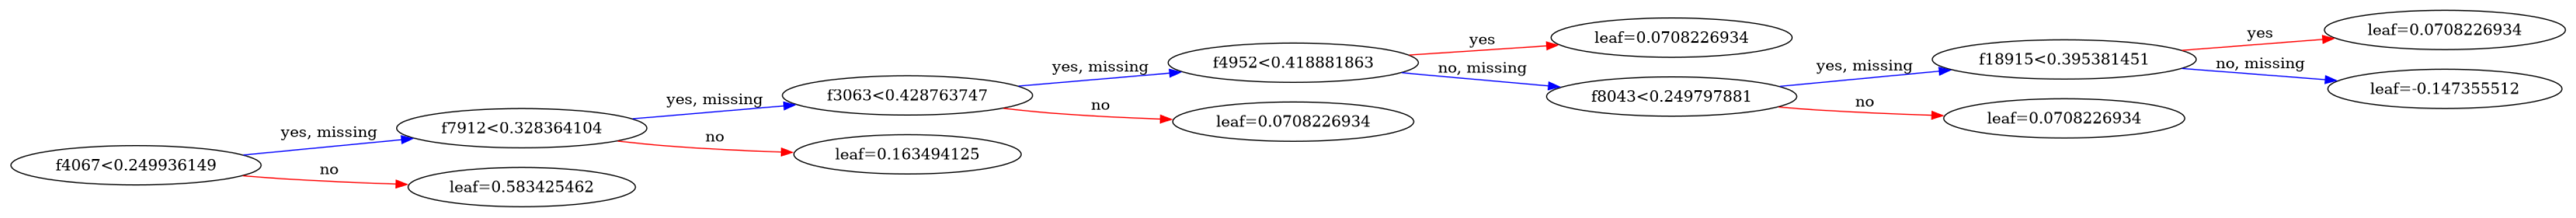

In [23]:
plot_tree(model, rankdir='LR', num_trees=1);

In [12]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

df = pd.read_csv("dbscan_ir_tnse.csv")

# Filter out senders with fewer than 20 appearances
sender_counts = df['Sender'].value_counts()
filtered_senders = sender_counts[sender_counts > 20].index
df_filtered = df[df['Sender'].isin(filtered_senders)]

# Separate features and target
X = df_filtered[['Message']]
y = df_filtered['Sender']  # Using 'Sender' as target
y=y==2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for each column type
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Message')  # Feature extraction for the text column
    ]
)

# List of models to evaluate
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=6),
#     "Random Forest": RandomForestClassifier(random_state=42, max_depth=6, n_estimators=100),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators=100)

# }

# Iterate over the models, fitting and predicting, and timing each step
    # Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
    

pipeline.fit(X_train, y_train)
from sklearn.metrics import RocCurveDisplay
logreg_roc = RocCurveDisplay.from_estimator(pipeline, X_test, y_test,plot_chance_level=True)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.False_

In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay

# Įkelti duomenų rinkinį
df = pd.read_csv("dbscan_ir_tnse.csv")

# Pašalinti siuntėjus, kurie pasirodo mažiau nei 20 kartų
sender_counts = df['Sender'].value_counts()
filtered_senders = sender_counts[sender_counts > 20].index
df_filtered = df[df['Sender'].isin(filtered_senders)]

# Naudoti du dažniausiai pasitaikančius siuntėjus kaip klases
top_senders = sender_counts.index[:44]  # Pasirinkti pirmus 2 dažniausiai pasitaikančius siuntėjus
df_filtered = df_filtered[df_filtered['Sender'].isin(top_senders)]

# Atskiriame požymius ir taikinį
X = df_filtered[['Message']]
y = df_filtered['Sender']== top_senders[2]  # True jei Sender atitinka pirmą dažniausią siuntėją, False kitu atveju

# Patikrinkite pradinį taikinio paskirstymą
print("y pasiskirstymas prieš padalijimą:\n", y.value_counts())

# Pasidalinti į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Patikrinti klasių pasiskirstymą mokymo ir testavimo rinkiniuose
print("y_train pasiskirstymas:\n", y_train.value_counts())
print("y_test pasiskirstymas:\n", y_test.value_counts())

# Jei abiejose klasėse nėra pavyzdžių mokymo/testavimo rinkinyje, gali prireikti pakoreguoti filtravimo arba taikinio nustatymo logiką
if y_train.nunique() < 2 or y_test.nunique() < 2:
    raise ValueError("Abiejose klasėse nėra pavyzdžių y_train arba y_test. Koreguokite filtravimo kriterijus.")

# Apibrėžti išankstinio apdorojimo veiksmus kiekvienam stulpelio tipui
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Message')  # Teksto stulpelio požymių išgavimas
    ]
)

# Sukurti modeliavimo vamzdyną su logistine regresija
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Vamzdyno apmokymas su mokymo duomenimis
pipeline.fit(X_train, y_train)


y pasiskirstymas prieš padalijimą:
 Sender
False    27710
True      2062
Name: count, dtype: int64
y_train pasiskirstymas:
 Sender
False    22162
True      1655
Name: count, dtype: int64
y_test pasiskirstymas:
 Sender
False    5548
True      407
Name: count, dtype: int64


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'Message')])),
                ('classifier', LogisticRegression(max_iter=1000))])

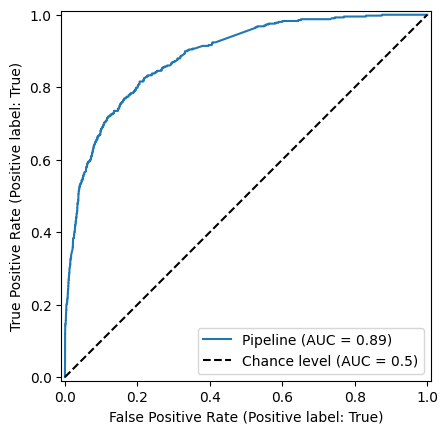

In [39]:

# ROC kreivės braižymas
logreg_roc = RocCurveDisplay.from_estimator(pipeline, X_test, y_test, plot_chance_level=True)


In [38]:
df_filtered = df[df['Sender'].isin(filtered_senders)];df_filtered.value_counts(['Sender']).shape

(44,)

In [41]:
top_senders

Index(['Rimantas Preiksas', 'Laurynas Antanauskas',
       'Vaida Å tarolytÄ Lesutiene', 'Roberta RÄÄkuvienÄ',
       'Mantas Mantinis', 'Irma Siaudvirtyte-barkauske', 'Italas Italijoje',
       'Indre DragÅ«nÄ', 'Karolis Petkus', 'Egidijus Grimaila',
       'Darius Briedis', 'Stanislovas DragÅ«nas', 'Svetlana JaÅ¡inskienÄ',
       'GabrielÄ Å iaulytytÄ', 'KamilÄ AntanauskienÄ', 'Audrius Gecas',
       'Rita Vidraite', 'Augustinas Prei', 'Giedrius Barkauskas',
       'Ernest Winckiewicz', 'Justinas Zvirblis', 'Sigitas Motuzas',
       'Migle Cerniauskaite', 'GraÅ¾ina BernotaitÄ', 'Evaldas Prekeris',
       'Gitana Å½imailÄ', 'Remi Gijus', 'Oskaras Feiferis',
       'Aivaras Zymancius', 'SkaistÄ SkaistutÄ', 'Marek Dunaj', 'Mindau Gas',
       'Raimonda Joksaite', 'Karolis Pocius', 'Zydrunas Stanslovas',
       'Judvytyte Austeja', 'Modesta Bazdaraite', 'Lai Mis',
       'Arturas Budrikas', 'Tadas Bagdonas', 'Radza Petkus',
       'Ramunas Litvinas', 'Raminta Ta', 'Dangua D

In [40]:
top_senders[2]

'Vaida Å\xa0tarolytÄ\x97 Lesutiene'